In [1]:
import plotly.express as px
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

In [2]:
mainData = pd.read_csv('MainDataNew.csv')

In [23]:
MonthBins = [mainData[mainData['incomePerMonth'] != 0]['incomePerMonth'].quantile(n/10, interpolation = 'midpoint') for n in range(1, 11)]
MonthBins = [0] + MonthBins

MonthBins = [0,
 4000.0,
 6000.0,
 7000.0,
 8000.0,
 9000.0,
 10000.0,
 12000.0,
 15000.0,
 40000.0]


In [38]:
DayBins = [mainData[mainData['incomePerDay'] != 0]['incomePerDay'].quantile(n/10, interpolation = 'midpoint') for n in range(1, 11)]
DayBins = [0] + DayBins

DayBins = [0, 250.0, 300.0, 400.0, 450.0, 500.0, 700.0, 1000.0]


In [39]:
mainData['DayBins'] = pd.cut(mainData['incomePerDay'], DayBins)
mainData['MonthBins'] = pd.cut(mainData['incomePerMonth'], MonthBins)

(array([ 62., 204.,  73.,  44.,  11.,   2.,   8.,   1.,   0.,   1.]),
 array([ 2000.,  5800.,  9600., 13400., 17200., 21000., 24800., 28600.,
        32400., 36200., 40000.]),
 <BarContainer object of 10 artists>)

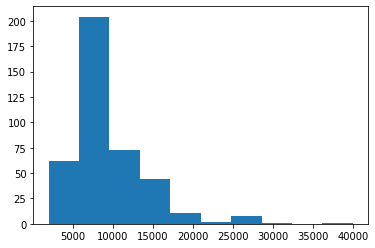

In [40]:
plt.hist(mainData[mainData['incomePerMonth'] != 0]['incomePerMonth'])

In [41]:
_16to55 = mainData[(mainData['Age'] >= 16) & (mainData['Age'] <= 55)]

_16to55.describe()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,aadharNumber,incomePerDay,incomePerMonth,Age,S.No
count,1167.000000,1167.000000,1167.000000,7.450000e+02,1167.000000,1167.000000,1167.000000,0.0
mean,897.286204,897.286204,433.389032,5.804898e+11,153.145673,2705.869751,34.167431,NaN
std,527.079450,527.079450,258.663874,2.431174e+11,230.830578,4900.727822,10.902277,NaN
min,0.000000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,16.000000,NaN
25%,426.500000,426.500000,211.000000,3.769396e+11,0.000000,0.000000,25.000000,NaN
50%,927.000000,927.000000,419.000000,5.763120e+11,0.000000,0.000000,33.000000,NaN
75%,1339.500000,1339.500000,654.000000,7.798104e+11,250.000000,5000.000000,44.000000,NaN
max,1790.000000,1790.000000,923.000000,9.979261e+11,1000.000000,30000.000000,55.000000,NaN


(array([  1., 174.,  57.,  90.,  55.,  10.,  11.,  30.,   1.,  15.]),
 array([ 100.,  190.,  280.,  370.,  460.,  550.,  640.,  730.,  820.,
         910., 1000.]),
 <BarContainer object of 10 artists>)

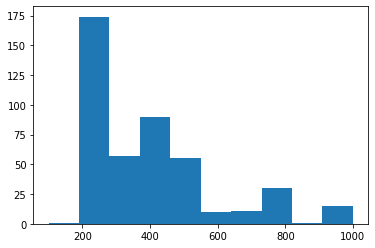

In [42]:
plt.hist(_16to55[_16to55['incomePerDay'] != 0]['incomePerDay'])

(array([  1., 237.,  83., 118.,  89.,  13.,  14.,  36.,   1.,  17.]),
 array([ 100.,  190.,  280.,  370.,  460.,  550.,  640.,  730.,  820.,
         910., 1000.]),
 <BarContainer object of 10 artists>)

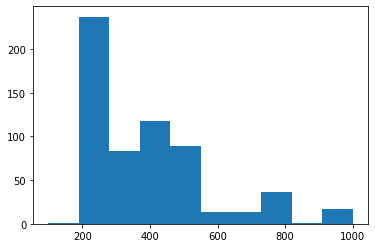

In [43]:
plt.hist(mainData[mainData['incomePerDay'] != 0]['incomePerDay'])

(array([ 35.,  83., 132.,  30.,  37.,   3.,   9.,   0.,   7.,   1.]),
 array([ 2000.,  4800.,  7600., 10400., 13200., 16000., 18800., 21600.,
        24400., 27200., 30000.]),
 <BarContainer object of 10 artists>)

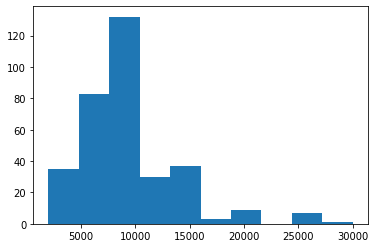

In [44]:
plt.hist(_16to55[_16to55['incomePerMonth'] != 0]['incomePerMonth'])

(array([ 62., 204.,  73.,  44.,  11.,   2.,   8.,   1.,   0.,   1.]),
 array([ 2000.,  5800.,  9600., 13400., 17200., 21000., 24800., 28600.,
        32400., 36200., 40000.]),
 <BarContainer object of 10 artists>)

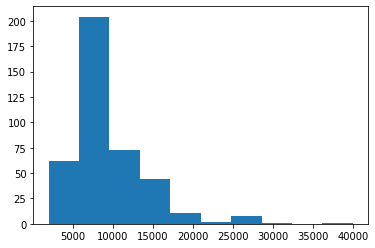

In [45]:
plt.hist(mainData[mainData['incomePerMonth'] != 0]['incomePerMonth'])

In [46]:
pd.crosstab(_16to55['MonthBins'], _16to55['Age Group'])

Age Group,10-20,20-30,30-40,40-50,50-60,60+
MonthBins,,,,,,
"(0.0, 4000.0]",1,7,7,13,5,0
"(4000.0, 6000.0]",3,7,13,14,8,0
"(6000.0, 7000.0]",1,13,13,10,1,0
"(7000.0, 8000.0]",4,21,22,11,6,0
"(8000.0, 9000.0]",3,15,8,5,4,0
"(9000.0, 10000.0]",0,12,10,12,1,0
"(10000.0, 12000.0]",2,11,10,2,2,0
"(12000.0, 15000.0]",1,15,15,8,0,1
"(15000.0, 40000.0]",0,9,8,3,0,0


In [53]:
pd.crosstab(_16to55['DayBins'], _16to55['Age Group'])

Age Group,10-20,20-30,30-40,40-50,50-60
DayBins,,,,,
"(0.0, 250.0]",6,35,43,72,19
"(250.0, 300.0]",1,11,13,15,7
"(300.0, 400.0]",2,14,16,17,8
"(400.0, 450.0]",1,11,13,10,8
"(450.0, 500.0]",2,13,8,26,5
"(500.0, 700.0]",0,9,8,4,0
"(700.0, 1000.0]",0,11,19,13,3


# Null and 0 data?

In [57]:
mainData['Vulnerabilities'].loc[mainData['Vulnerabilities'] == 'None'] = 'Others'

mainData['Vulnerabilities'].unique()

C:\Users\orect\AppData\Local\Temp/ipykernel_18668/39140325.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



array(['Others', 'Lactating mother', 'Widow', 'Widower',
       'Elderly >60 years', 'Pregnant women', 'Differently abled',
       'Children below 2 years', 'Children below 2years',
       'Elderly >60 years,Widow'], dtype=object)

In [69]:
mainData['WorkFrom'] = mainData['WorkFrom'].str.replace('.', ':')

mainData['WorkFrom'] = mainData['WorkFrom'].replace({'Na' : pd.NA, 'NO' : pd.NA, 'Anytim' : 'No Fixed Schedule', 'AnyTim' : 'No Fixed Schedule'})

C:\Users\orect\AppData\Local\Temp/ipykernel_18668/2377621784.py:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [83]:
#from datetime import strptime

def to_dt(data):
    try:
        return pd.to_datetime(data)
    except:
        pass

mainData['WorkFrom'] = mainData['WorkFrom'].apply(to_dt)
mainData['WorkTo'] = mainData['WorkTo'].apply(to_dt)

mainData['WorkDelta'] = mainData['WorkTo'] - mainData['WorkFrom']


(array([1851.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           3.]),
 array([-9.22337204e+18, -8.30102979e+18, -7.37868755e+18, -6.45634531e+18,
        -5.53400306e+18, -4.61166082e+18, -3.68931857e+18, -2.76697633e+18,
        -1.84463409e+18, -9.22291844e+17,  5.04000000e+13]),
 <BarContainer object of 10 artists>)

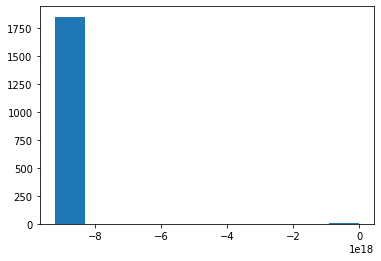

In [84]:
plt.hist(pd.to_numeric(mainData['WorkDelta']))